##Predicting Life Expectancy Using Linear Regression
We are going to use world health organization data (WHO) to train and evaluate our modal.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


df = pd.read_csv("./Life_Expectancy_Data.csv")
df.columns = df.columns.str.strip()
num_df = df.select_dtypes(include=['float64', 'int64'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

np.float64(54.26583882817278)

np.float64(54.26583882817278)

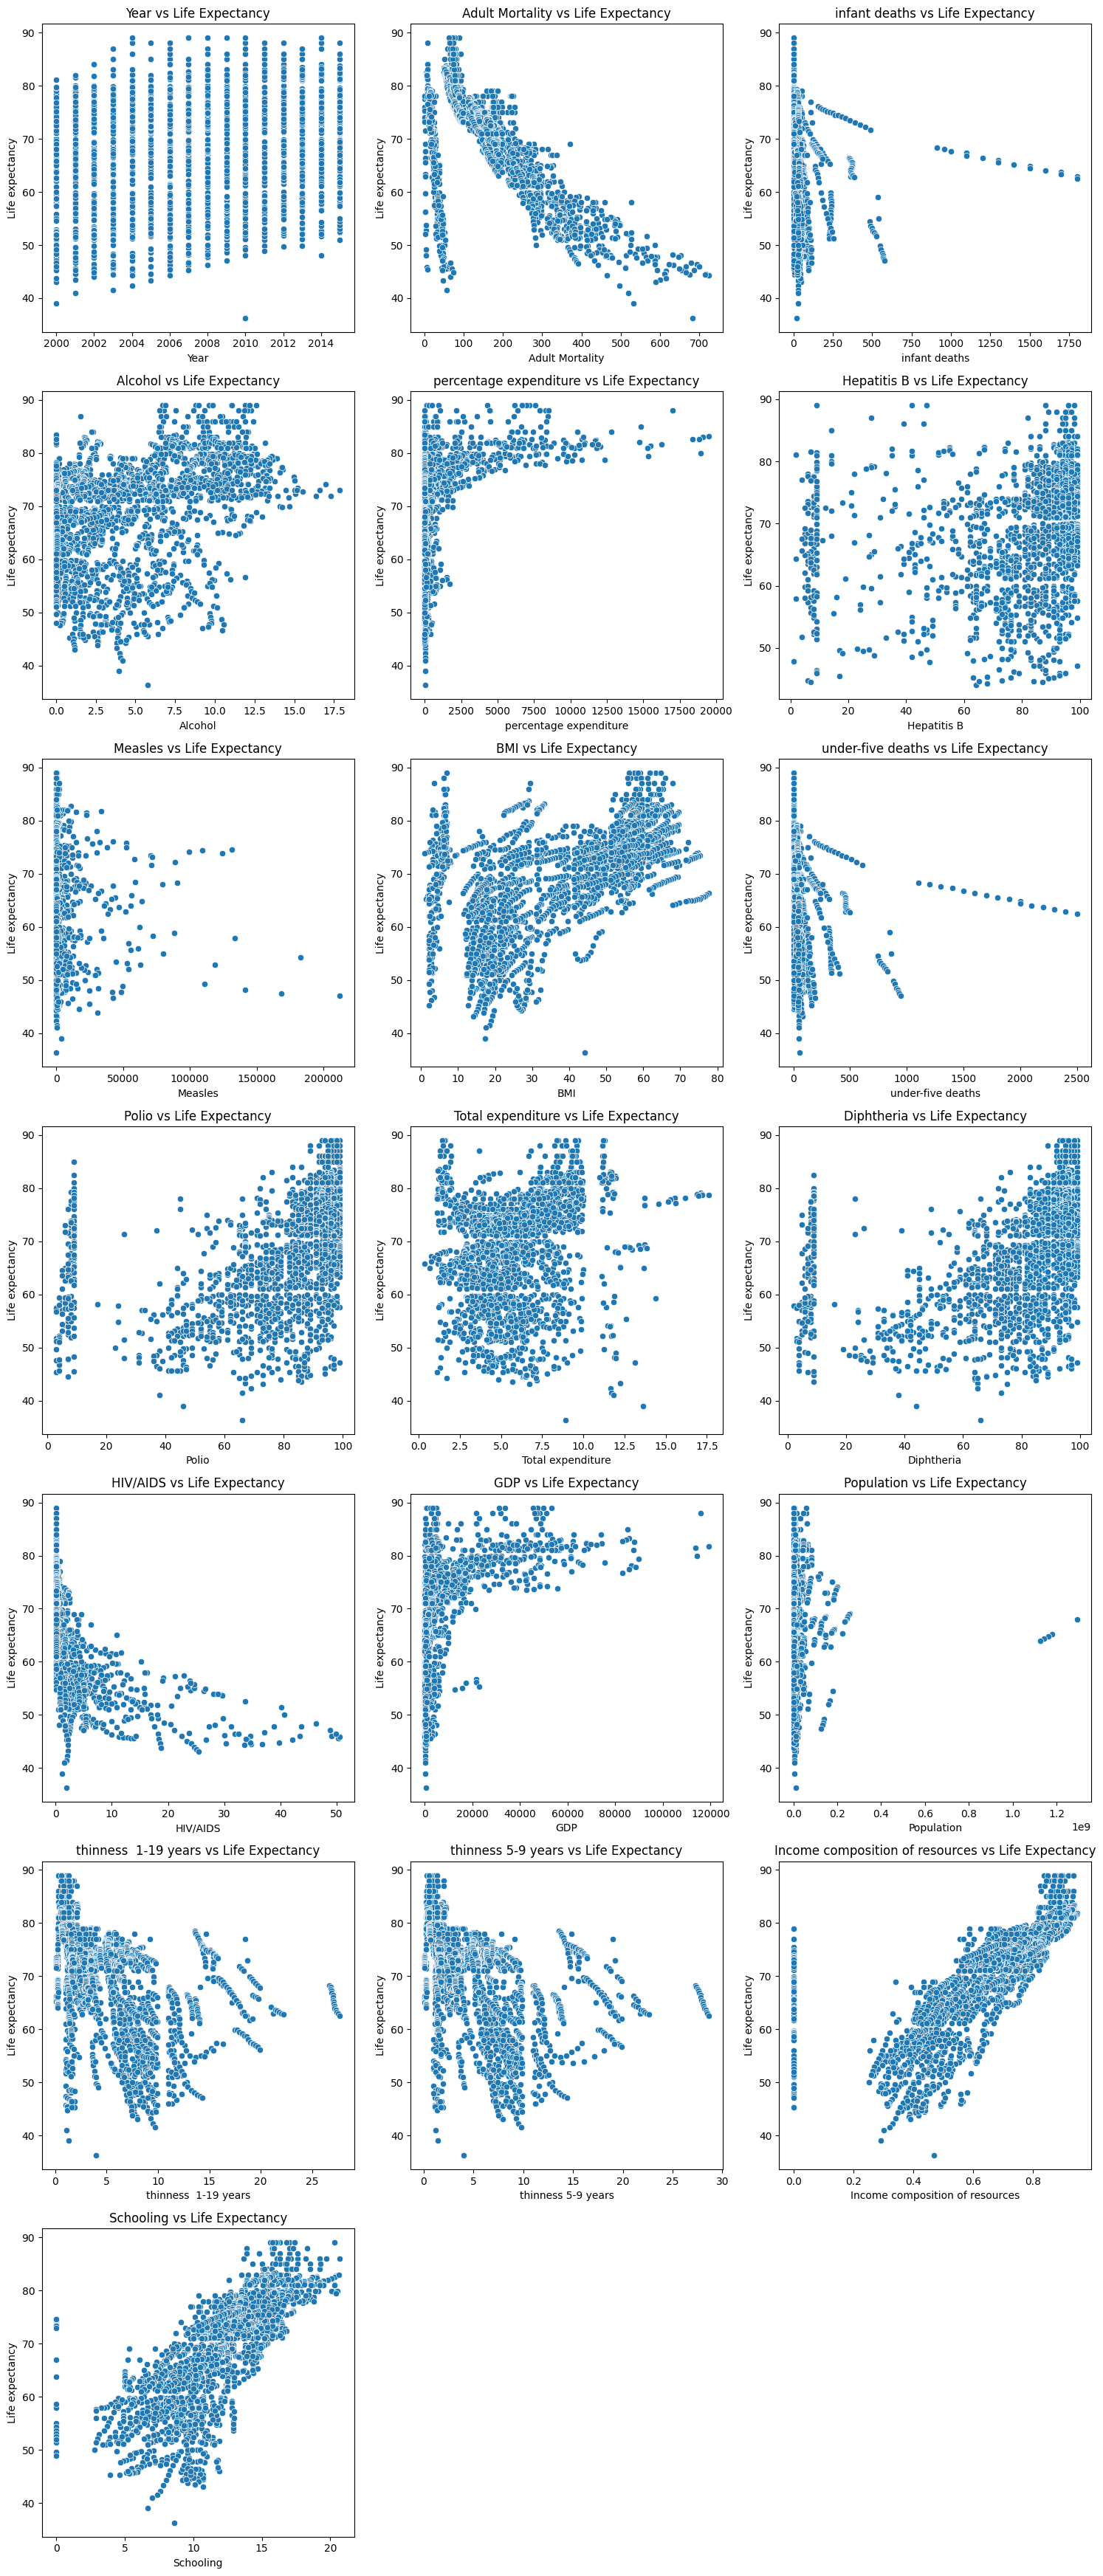

In [15]:
# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Number of features to plot (excluding 'Life expectancy')
features_to_plot = [feature for feature in numerical_features if feature != 'Life expectancy']
num_features = len(features_to_plot)

# Set up the grid layout
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed for the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the grid to make it easier to index

# Loop through features and create scatter plots
for i, feature in enumerate(features_to_plot):
    sns.scatterplot(x=df[feature], y=df['Life expectancy'], ax=axes[i])
    axes[i].set_title(f'{feature} vs Life Expectancy')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [40]:
correlation_matrix = num_df.corr(method='pearson')
correlations = correlation_matrix['Life expectancy'].abs().sort_values(ascending=False)

# Create a DataFrame with correlations
correlations_df = pd.DataFrame(correlations)
correlations_df.columns = ['Correlation']

# Define color mapping function
def highlight_correlations(val):
    if val <= 0.19:
        return 'background-color: #ffcccc; color: black'  # Very weak - light red
    elif val <= 0.39:
        return 'background-color: #ffb3b3; color: black'  # Weak - slightly darker red
    return ''

# Display styled DataFrame highlighting weak and very weak correlations
correlations_df.style.applymap(highlight_correlations)

/var/folders/52/mdtgs1sn50jd99c9chrgtjm00000gn/T/ipykernel_12452/4080238566.py:17: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  correlations_df.style.applymap(highlight_correlations)


,Correlation
Life expectancy,1.000000
Schooling,0.751975
Income composition of resources,0.724776
Adult Mortality,0.696359
BMI,0.567694
HIV/AIDS,0.556556
Diphtheria,0.479495
thinness 1-19 years,0.477183
thinness 5-9 years,0.471584
Polio,0.465556


Test for Homoscedasticity
Note Before running this cell make sure you impute the data frame or else it will not work

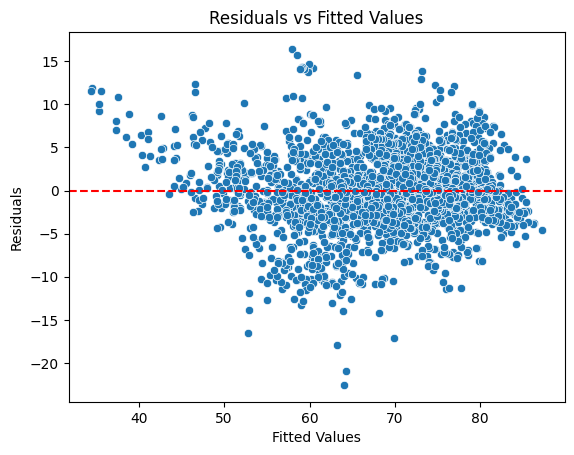

In [22]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Fit a Linear Regression model
X = df.drop(columns=['Life expectancy', 'Country', 'Year', 'Status']).dropna()  # Adjust for your columns
y = df['Life expectancy'].dropna()
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Residuals vs Fitted Values Plot
residuals = model.resid
fitted_values = model.fittedvalues
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


In [ ]:
# Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

Test for Perfect Multicollinary

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                            Feature         VIF
0                             const   69.049244
1                   Adult Mortality    1.795984
2                     infant deaths  212.177699
3                           Alcohol    1.938381
4            percentage expenditure   12.847295
5                       Hepatitis B    1.651864
6                           Measles    1.514114
7                               BMI    1.796920
8                 under-five deaths  201.999311
9                             Polio    1.712620
10                Total expenditure    1.118562
11                       Diphtheria    2.092936
12                         HIV/AIDS    1.482079
13                              GDP   13.516874
14                       Population    1.943391
15             thinness  1-19 years    7.602562
16               thinness 5-9 years    7.584519
17  Income composition of resources    2.971489
18                        Schooling    3.512993


We can also see the distribution of life expentancy as normal distribution

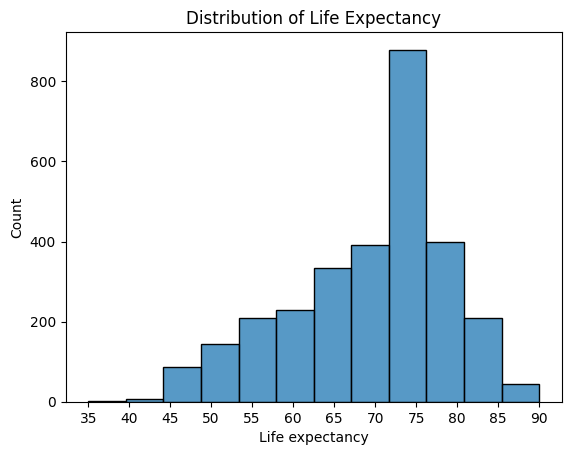

In [23]:
sns.histplot(df['Life expectancy'], binrange=(35,90), bins=12)
plt.title('Distribution of Life Expectancy')
plt.xticks(list(range(35,95,5)))
plt.show()

Heat Map of correlation

<Axes: >

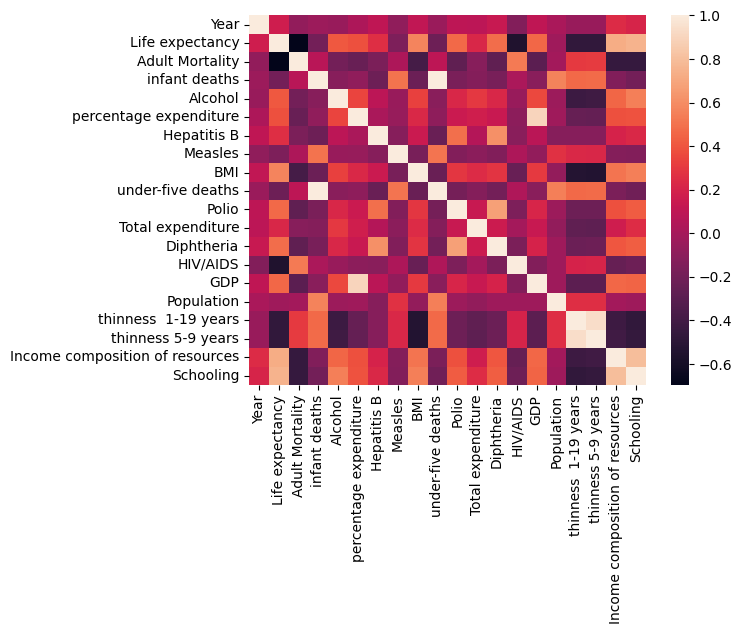

In [41]:

sns.heatmap(correlation_matrix)

Handling missing data (imputing)

first let see how many null values we have for each column

In [4]:
def get_null_cols(data):
    a=list(data.columns)
    b=[]
    for i in a:
        c=data[i].isnull().sum()
        b.append(c)
    null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
    return null_df

get_null_cols(df)

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,10
4,Adult Mortality,10
5,infant deaths,0
6,Alcohol,194
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


Removing missing data or null data
when removing null our data becomes very small, so this not the best solution.

In [32]:
df.dropna().shape

(1649, 22)

Filling with the median value

In [5]:
def replace_median(series):
    series = series.fillna(series.median(), inplace=True)
    return series
## looping through every column to convert missing values with mean 
for series in num_df.columns:
    if(series == "Diphtheria"): #we want to use linear regression for this column
        continue
    if(series == "Income composition of resources"): #we want to use custom imputing for this column
        continue
    if(series == "Schooling"): #we want to use KNN for this column
        continue
    replace_median(df[series])

df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                          19
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources    167
Schooling                          163
dtype: int64

Custom imputing 

In [6]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
df['Income composition of resources']=df[['Income composition of resources','Life expectancy']].apply(impute_Income,axis=1)

/var/folders/52/mdtgs1sn50jd99c9chrgtjm00000gn/T/ipykernel_29367/634628897.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i=c[0]
/var/folders/52/mdtgs1sn50jd99c9chrgtjm00000gn/T/ipykernel_29367/634628897.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  l=c[1]


Linear regression (for example predicting Diphtheria from Polio)

In [7]:

# Data where 'Diphtheria ' is not null
train_data = df[df['Diphtheria'].notnull()]
test_data = df[df['Diphtheria'].isnull()]

# Train regression model
model = LinearRegression()
model.fit(train_data[['Polio']], train_data['Diphtheria'])

# Predict missing values
df.loc[df['Diphtheria'].isnull(), 'Diphtheria'] = model.predict(test_data[['Polio']])

KNN (K-Nearest Neighbors)

In [8]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(df[['Life expectancy', 'Schooling']])
df[['Life expectancy', 'Schooling']] = data_imputed

Categorical data to numeric one hot (dummy variable)

In [55]:
#df['Year'] = df['Year'].astype('str')

df = pd.get_dummies(df, drop_first=True)
print(df.head())
df.shape

   Year  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0  2015             65.0            263.0             62     0.01   
1  2014             59.9            271.0             64     0.01   
2  2013             59.9            268.0             66     0.01   
3  2012             59.5            272.0             69     0.01   
4  2011             59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  ...  \
0               71.279624         65.0     1154  19.1                 83  ...   
1               73.523582         62.0      492  18.6                 86  ...   
2               73.219243         64.0      430  18.1                 89  ...   
3               78.184215         67.0     2787  17.6                 93  ...   
4                7.097109         68.0     3013  17.2                 97  ...   

   Country_United States of America  Country_Uruguay  Country_Uzbekistan  \
0                     

(2938, 213)

if we want to drop the categorical feature we can do the following (do it before the above or else it will show error)

In [ ]:
cat_remove_list = ['Country', 'Year', 'Status']
df_update = df.drop(cat_remove_list, axis=1)

Selecting best feature for our Regression.

In [ ]:
variable_list = ['Schooling', 'Income composition of resources', 'GDP', 'Diphtheria', 
                'Polio', 'BMI', 'percentage expenditure', 'Alcohol', 'Life expectancy']
df_last = df_update[variable_list]
df_last.head()

Preparing our traning and testing data

In [56]:
from sklearn.model_selection import train_test_split

# Lets set 30% for testing and 70% for training the model.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Traning
Lets solve this problem by using Linear Regression and see what it gives us.

In [57]:
Linear_model= LinearRegression()
Linear_model.fit(X_train,y_train)

LinearRegression()

We have fit our model, Now lets go for testing

In [60]:
predictions_lr=Linear_model.predict(X_test)
predictions_lr[0:10]

array([49.80379731, 61.43966254, 76.60587016, 65.80497897, 70.94121439,
       71.02378968, 72.9453651 , 77.24449692, 64.68495534, 79.1016426 ])

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('R-squared: ', r2_score(y_test, predictions_lr))
print('MAE: ',mean_absolute_error(y_test, predictions_lr))
print('MSE: ', mean_squared_error(y_test, predictions_lr))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions_lr)))

R-squared:  0.8179448823160272
MAE:  2.9959536402303093
MSE:  15.755354300007856
RMSE:  3.9693014876685617


In [63]:
Linear_model.coef_

array([ 0.00000000e+00, -1.98214353e-02,  1.07476534e-01,  1.22970731e-01,
        6.07380418e-05, -1.76773365e-02, -1.93700556e-05,  4.40310170e-02,
       -8.10513547e-02,  3.31991999e-02,  8.92909740e-02,  3.79704271e-02,
       -4.49350759e-01,  5.41050513e-05,  7.83625351e-10, -1.07455975e-01,
        2.73995850e-02,  5.48169370e+00,  7.06185484e-01])

In [64]:
Linear_model.intercept_

np.float64(54.26583882817278)

Other Regression Model (Regularized Linear Regressions)

In [66]:
from sklearn.linear_model import Ridge
ridge_model=Ridge()
ridge_model.fit(X_train,y_train)
predictions2=ridge_model.predict(X_test)

print('R-squared: ', r2_score(y_test, predictions2))
print('MAE: ',mean_absolute_error(y_test, predictions2))
print('MSE: ', mean_squared_error(y_test, predictions2))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions2)))

R-squared:  0.8178427463030767
MAE:  2.99695493448683
MSE:  15.764193321350938
RMSE:  3.970414754323651


/Users/basliel/projects/ml/life-expectancy-LR/venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.50104e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [67]:
from sklearn.linear_model import Lasso

lasso_model=Lasso(alpha=0.00000001)
lasso_model.fit(X_train,y_train)
predictions3=lasso_model.predict(X_test)

print('R-squared: ', r2_score(y_test, predictions3))
print('MAE: ',mean_absolute_error(y_test, predictions3))
print('MSE: ', mean_squared_error(y_test, predictions3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions3)))

R-squared:  0.817966411180076
MAE:  2.99578393974241
MSE:  15.753491156114519
RMSE:  3.9690667865525415


/Users/basliel/projects/ml/life-expectancy-LR/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.737e+04, tolerance: 1.890e+01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
import numpy as np
import pandas as pd

# Using the same features you selected in your notebook
variable_list = ['Schooling', 'Income composition of resources', 'GDP', 'Diphtheria', 
                'Polio', 'BMI', 'percentage expenditure', 'Alcohol']

# Get X and y from your dataframe
X = df[variable_list].values
y = df['Life expectancy'].values

# Initial parameters
theta = np.zeros(len(variable_list) + 1)  # +1 for bias term
alpha = 0.0001          # Small learning rate due to the scale of your data
epochs = 1000         # Increased epochs for better convergence

M = len(X)
N = len(X[0])
predictions_history = np.zeros((M, epochs))

def hypothesis(x, theta):
    return theta[0] + np.dot(x, theta[1:])

for epoch in range(epochs):
    if epoch % 100 == 0:  # Print every 100 epochs
        print(f"epoch {epoch}")
    errors = []
    predictions = []

    for i in range(M):
        h = hypothesis(X[i], theta)
        predictions.append(h)
        errors.append(h - y[i])
        predictions_history[i][epoch] = h

    # Update theta using vectorized operations
    theta[0] = theta[0] - alpha * (1/M) * sum(errors)
    for j in range(N):
        theta[j + 1] = theta[j + 1] - alpha * (1/M) * sum((predictions[i] - y[i]) * X[i][j] for i in range(M))

# Plotting
plt.figure(figsize=(15, 8))

# Plot predictions for a sample of examples (first 5)
for i in range(min(5, M)):
    plt.plot(range(epochs), predictions_history[i], label=f'Example {i+1} (Target: {y[i]:.2f})')
    plt.axhline(y=y[i], linestyle='--', alpha=0.3)

plt.xlabel('Epoch')
plt.ylabel('Life Expectancy Prediction')
plt.title('Predictions vs Epochs for Sample Examples')
plt.legend()
plt.grid(True)
plt.show()

# Print final results for first 5 examples
print("\nFinal Results (Sample):")
print("Example | Prediction | Actual | Error")
print("-" * 50)
for i in range(min(5, M)):
    final_pred = predictions_history[i][-1]
    print(f"{i+1:7d} | {final_pred:9.2f} | {y[i]:6.2f} | {abs(final_pred - y[i]):5.2f}")

# Calculate R-squared
ymean = np.mean(y)
ss_res = sum((y[i] - predictions_history[i][-1]) ** 2 for i in range(M))
ss_tot = sum((y[i] - ymean)**2 for i in range(M))
r_squared = 1 - (ss_res / ss_tot)
print(f"\nR-squared: {r_squared:.4f}")

np.float64(54.26583882817278)